# SVM

In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
import numpy as np
# 데이터 시각화, 한글폰트
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')

# scaling
from sklearn.preprocessing import StandardScaler
# data split
from sklearn.model_selection import train_test_split
# SVM
from sklearn.svm import SVC
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#### 데이터 구성하기

In [2]:
df_raw = pd.read_csv("D:/data/2/통신고객이탈.csv",encoding='euc-kr')
df_raw

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Churned,K413330,M,19,Play 100,SOP10,Med,17.40,12,60,100.8,27,59.4,127,628.2
926,Churned,K413410,F,59,Play 100,SOP20,Med,17.37,15,82,130.2,12,25.8,357,650.7
927,Churned,K415490,F,33,Play 300,S50,Med,44.93,12,174,286.2,25,67.0,596,1039.0
928,Churned,K415880,F,25,Play 300,S50,Med,40.43,14,315,552.0,0,0.0,609,1188.3


#### 결측치 처리

In [3]:
# 데이터 구성하기 - 결측치 처리
df_raw.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

<AxesSubplot:>

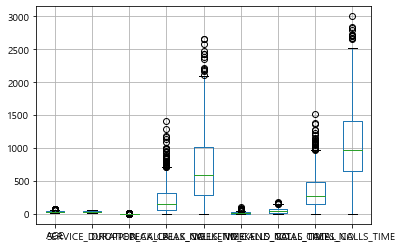

In [4]:
df_raw.boxplot()

<AxesSubplot:>

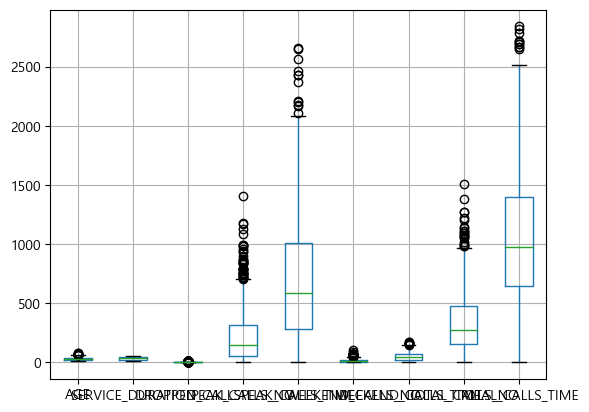

In [5]:
#이상치 제거
df_raw = df_raw[df_raw["TOTAL_CALLS_TIME"]<3000] 
df_raw.boxplot()

#### 더미변수 생성

In [6]:
# 데이터 구성하기 - 더미변수 생성
# 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CHURN_Active,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,1,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,1,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,1,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [7]:
# 데이터 구성하기 - 데이터 분할
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('CHURN_Active', axis=1 ,inplace=False)
df_raw_y = df_raw_dummy['CHURN_Active']

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print('분할 전 설명변수 데이터:', df_raw_x.shape)
print('분할 후 설명변수 데이터:Train', df_train_x.shape, 'Test',df_test_x.shape)

분할 전 설명변수 데이터: (929, 963)
분할 후 설명변수 데이터:Train (650, 963) Test (279, 963)


## SVC 모델 생성 - 기본 옵션으로 모델 생성

In [8]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(svm_uncustomized.score(df_train_x, df_train_y)))
# test데이터 정확도
print('Accuracy on test set: {:.3f}'.format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.794
Accuracy on test set: 0.835


## SVC 모델 Parameter 변경 - C: 규제에 대한 강도 변경

In [9]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제 (0.01, 0.1, 1 ,10)
para_c = [10 **c for c in range(-2,2)]
# para_c = [0.1 *c for c in range(1,10)] # C 변화 구간 변경

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [10]:
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.794,0.835
1,0.10,0.794,0.835
2,1.00,0.794,0.835
3,10.00,0.794,0.835


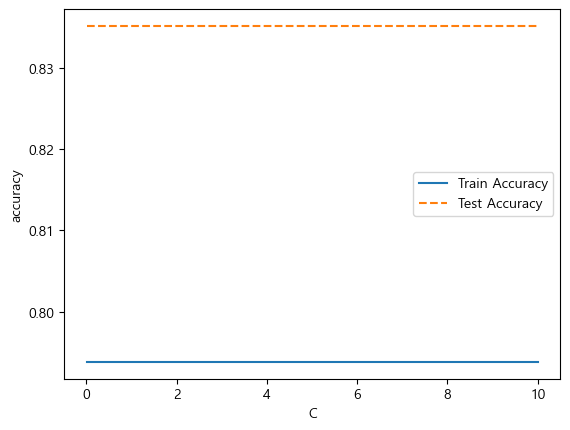

In [11]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

#### C가 1 이상이면 train 데이터 이용한 모델의 정확도는 1(과대적합) test 정확도는 변화 없음
#### C가 0.1 ~ 1.0 변화 시 정확도 확인 필요

In [12]:
C = 0.1

## SVC 모델 Parameter 변경 - Gamma : 훈련 샘플이 미치는 영향의 범위를 변경

In [13]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제 (0.01, 0.1, 1 ,10)
para_gamma = [10 **gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 0.1, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [14]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.7938,0.8351
1,0.10,0.7938,0.8351
2,1.00,0.7938,0.8351
3,10.00,0.7938,0.8351


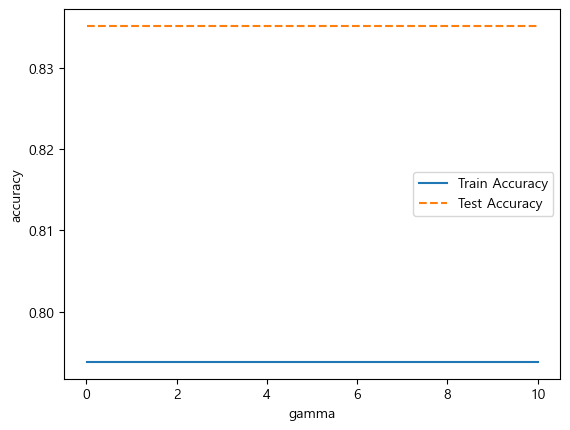

In [15]:
# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('gamma')
plt.legend()

#### gamma 변화는 정확도에 영향을 미치지 않음
#### gamma 변화 구간을 변경하여 정확도 확인 가능

## scale 변환 - Standardscaler : 설명변수 값의 구간을 동일하게

In [16]:
# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,CHURN_Churned,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,-0.030131,-0.071718,0.948412,-0.028119,-0.617014,-0.432961,-0.756230,0.084158,-0.784983,-0.490225,...,-0.456139,-0.109465,-0.104314,-0.374002,-0.267415,-0.128107,0.914313,-0.585223,-0.360791,-0.046449
1,-0.335220,-0.245352,2.090441,0.664374,-0.077600,-0.308183,-0.580807,0.265865,-0.457308,-0.490225,...,-0.456139,-0.109465,-0.104314,-0.374002,-0.267415,-0.128107,0.914313,-0.585223,-0.360791,-0.046449
2,-0.335220,1.062544,2.375948,0.159524,-0.222692,-0.994460,-1.348282,-0.323674,-0.818671,-0.490225,...,-0.456139,-0.109465,-0.104314,-0.374002,-0.267415,-0.128107,0.914313,-0.585223,-0.360791,-0.046449
3,2.258035,1.006078,-0.479123,0.311426,-0.067069,-0.121017,1.433814,-0.077360,-0.395454,-0.490225,...,-0.456139,-0.109465,-0.104314,-0.374002,-0.267415,-0.128107,0.914313,-0.585223,-0.360791,-0.046449
4,1.571585,1.530507,-0.764631,-0.014716,-0.274176,-0.557738,-0.663037,-0.287333,-0.710244,-0.490225,...,-0.456139,-0.109465,-0.104314,-0.374002,-0.267415,-0.128107,0.914313,-0.585223,-0.360791,-0.046449


In [17]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state= 1234)
print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (650, 963)
test data X size: (279, 963)


## scale 조절 후 SVC 모델 재실행 - scale이 조정된 데이터로 새로운 모델 생성

In [18]:
svm_scaled = SVC(random_state= 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set: {:.3f}'.format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.835


#### sclae 조절 후 정확도가 올라간 것을 확인

## 새로운 SVC 모델 Parameter 변경 - C: 규제에 대한 강도 변경

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제 (0.01, 0.1, 1 ,10)
para_c = [10 **c for c in range(-2,2)]
# para_c = [0.1 *c for c in range(1,10)] # C 변화 구간 변경

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

In [20]:
# C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.794,0.835
1,0.10,0.794,0.835
2,1.00,1.000,0.835
3,10.00,1.000,0.835


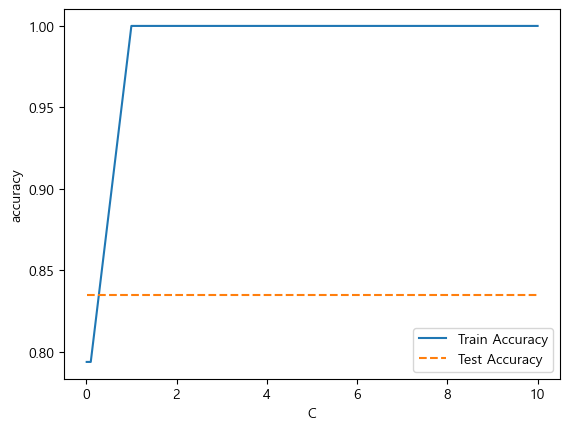

In [21]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('C')
plt.legend()

#### C가 1일 때 모델의 정확도가 많이 증가함
#### 필요시 C 변화 구간을 0.1 ~ 1.0 변경하여 정확도 확인 가능

In [22]:
# 임의로 지정
C = 1

## 새로운 SVC 모델 Parameter 변경 - Gamma: 훈련 샘플이 미치는 영향의 범위를 변경 결과

In [23]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제 (0.01, 0.1, 1 ,10)
para_gamma = [10 **gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

In [24]:
# Gamma별 정확도 테이블
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,1.0,0.835
1,0.10,1.0,0.835
2,1.00,1.0,0.835
3,10.00,1.0,0.835


#### gamma가 1 이상이면 train 데이터의 모델은 과대적합
#### gamma 변화 구간을 변경하여 정확도 확인 가능

In [25]:
# 임의로 지정
gamma = 0.1

## 결론 도출 - 최종 모델 선택

In [30]:
svc_final = SVC(gamma = 0.1, C = 1, random_state= 1234)
svc_final.fit(df_scaled_train_x, df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
# 목표변수의 빈도 불귱형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 1.000
Accuracy on test set: 0.835
Confusion matrix: 
[[  0  46]
 [  0 233]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        46
           1      0.835     1.000     0.910       233

    accuracy                          0.835       279
   macro avg      0.418     0.500     0.455       279
weighted avg      0.697     0.835     0.760       279



c:\dev\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\dev\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\dev\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### test 데이터 기준 정분류율은 94.2%
#### "1" 기준 f1 score는 54.5% (precision은 100%이나 recall이 매우 낮음)

## GridSearchCV를 이용한 최적 parameter 찾기

In [27]:
estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C":para_c,
             "gamma":para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring = "accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=0.01, gamma=0.01, random_state=1234)

best parameter: 
{'C': 0.01, 'gamma': 0.01}

best score: 
0.794


#### GridSearch 결과 C=10, gamma=0.1일 때 모델의 정확도 가장 높음 (0.96)